In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import dataframe_image as dfi

In [6]:
import tqdm
import cvxpy as cp
import scipy.optimize as scopt

c = -np.array([1, 2, 3])
A_ub = np.array([[2, 1, 3]])
b_ub = np.array([5.])
bounds = [(0, 1) for i in range(3)]
scopt.linprog(c=c, A_ub=A_ub, b_ub=b_ub, bounds=bounds, integrality=np.array([1, 1, 1]), method='highs')

cp.__version__

import cvxpy as cp

x = cp.Variable(3, boolean=True)
c = np.array([1., 2., 3.])
A = np.array([2., 1., 3.])
b = 5.
obj = cp.Maximize(cp.sum(c @ x))
cons = [(A @ x) <= b]
prb = cp.Problem(obj, cons)
sol = prb.solve(verbose=False, solver='GLPK_MI')


In [5]:
# np.random.seed(0)
n = 1000
samples = np.random.uniform(size=n)
n_bs = 100
res_bs = np.zeros(n_bs)

for i in range(n_bs):
    idx_bs = np.random.choice(n_bs, n)
    res_bs[i] = max(samples[idx_bs])


In [6]:
E = np.array([-5., -1., -0.5])
P0 = np.array([10., 10., 10.])
Q0 = 1. * np.array([10., 20., 5.0])
C = np.array([5.0, 6.0, 9.0])
R0 = np.sum(P0 * Q0)
M0 = np.sum((P0 - C) * Q0)

def f_obj(x):
    f = - np.sum(Q0 * P0 * x * np.exp(E * (x-1.)))
    return f

def f_cons(x):
    f = np.sum(Q0 * (P0 * x - C) * np.exp(E * (x-1.0)))
    return f

obj = f_obj
cons = [scopt.NonlinearConstraint(f_cons, lb=M0, ub=np.inf)]
cons = []
x_bounds = [(0.9, 1.1)] * 3
x0 = [1.0] * 3

scopt.minimize(obj, x0, bounds=x_bounds, constraints=cons, method='slsqp', options={'eps': 1e-5})


     fun: -400.7025152460359
     jac: array([ 5.77042078e+02,  3.00092324e-03, -2.14028348e+01])
 message: 'Optimization terminated successfully'
    nfev: 17
     nit: 4
    njev: 3
  status: 0
 success: True
       x: array([0.90000003, 0.9999671 , 1.09999999])

In [7]:
# load data as dictionary of components
# component data consists of cost and composition 
comp_data = {
    "A": {"cost": 2.0, "Vit A": 0.5, "Vit B": 0.2},
    "B": {"cost": 2.0, "Vit A": 0.4, "Vit B": 0.1},
    "C": {"cost": 5.0, "Vit A": 0.3, "Vit B": 0.3},
}

# use pandas to create a nice display
pd.DataFrame.from_dict(comp_data, orient='index')

,cost,Vit A,Vit B
A,2.0,0.5,0.2
B,2.0,0.4,0.1
C,5.0,0.3,0.3


In [8]:
prod_req = {
    "Vit A": {"lb": 0.0, "ub": 0.4},
    "Vit B": {"lb": 0.2, "ub": 1.0},
}
pd.DataFrame.from_dict(prod_req, orient='index')

,lb,ub
Vit A,0.0,0.4
Vit B,0.2,1.0


In [2]:
31 * 1_000_000_000_000 / 400_000_000

77500.0

In [9]:
excl_pairs = [("A", "B")]

In [10]:
# m = ConcreteModel()

# # define sets that will be used to index decision variables and constraints
# # remember to use initialize keyword
# m.comp = Set(initialize=comp_data.keys())
# m.req = Set(initialize=prod_req.keys())

# # define a set to that includes the excluded pairs
# m.pairs = Set(initialize=excl_pairs)

# # decision variables
# m.x = Var(m.comp, domain=NonNegativeReals, bounds=(0, 1))

# # objective function
# m.cost = Objective(expr=sum(m.x[c]*comp_data[c]["cost"] for c in m.comp), sense=minimize)

# # structural constraints
# m.massfraction = Constraint(expr=sum(m.x[c] for c in m.comp)==1)

# # composition constraints
# m.lb = Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) >= prod_req[r]["lb"])
# m.ub = Constraint(m.req, rule=lambda m, r: sum(m.x[c]*comp_data[c][r] for c in m.comp) <= prod_req[r]["ub"])

# # component incompatability constraints
# m.disj = Disjunction(m.pairs, rule=lambda m, a, b: [m.x[a] == 0, m.x[b] == 0])

# # apply transformations
# TransformationFactory('gdp.hull').apply_to(m)

# # solve
# solver = SolverFactory('cbc')
# solver.solve(m)

# for c in m.comp:
#     print(f"{c} = {m.x[c]()}")

In [135]:
X1, Y1 = 0.0, 0.0
X2, Y2 = 1.0, 2.0
# N = V2 / V1
N = 1.5

X = cp.Variable(1)
Y_ = 1.0

objective = cp.norm(cp.hstack([X-X1, Y-Y1]), 2) + N * cp.norm(cp.hstack([X2-X, Y2-Y]), 2)
constraints = []
constraints.extend([X >= 0.0, X <= X2])
problem = cp.Problem(cp.Minimize(objective), constraints)
obj_val = problem.solve('ECOS')
X_ = X.value[0]


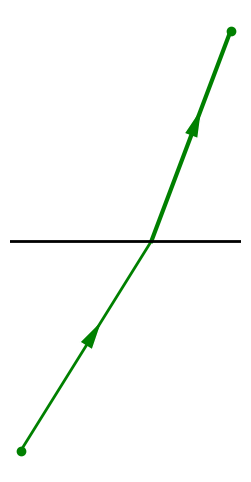

In [136]:
lw = 2.
lw1 = lw
lw2 = lw1 * N

plt.figure(figsize=(12, 6))
plt.plot([X1, X_], [Y1, Y_], c='g', lw=lw1)
plt.arrow(X1, Y1, 0.5 * (X_ - X1), 0.5 * (Y_ - Y1), head_width=0.07, head_length=0.15, color='g', ec='w')
plt.scatter([X1], [Y1], marker='o', c='green')
plt.plot([X_, X2], [Y_, Y2], c='g', lw=lw2)
plt.arrow(X_, Y_, 0.5 * (X2 - X_), 0.5 * (Y2 - Y_), head_width=0.07, head_length=0.15, color='g', ec='w')
plt.scatter([X2], [Y2], marker='o', c='green')
plt.axhline(Y_, X1, X2, lw=2, c='k')

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

In [137]:
w1, h1 = (X_ - X1), (Y_ - Y1)
l1 = (w1 ** 2 + h1 ** 2) ** (0.5)

w2, h2 = (X2 - X_), (Y2 - Y_)
l2 = (w2 ** 2 + h2 ** 2) ** (0.5)

sin1, sin2 = w1 / l1, w2 / l2
print(f'find sin1/sin2 = {round(sin1 / sin2, 3)}, ; real n = {round(N, 3)}', )


find sin1/sin2 = 1.5, ; real n = 1.5


### Примеры входных данных

In [4]:
def china_restaurant_clusters(n_guests, n_seats, alpha=2.0, seed=0):
    """
    Генерация кластеров с помощью процесса китайского ресторана с модификацией:
    процесс ограничен сверху числом мест, если места закончилось, то гость выбирает 
    место среди занятых мест как в обычном процессе
    
    n_guests - число гостей
    n_seats - число мест
    alpha - концентрационный параметр, отвечающий за скученность кластеров
    
    """
    
    np.random.seed(seed)
    # количество занятых столов к текущему моменту
    k_occ = 1
    # номер столика за который садится гость
    gs = np.zeros(n_guests)
    gs[0] = 1
    # количество гостей за каждым столиком, для удобства генерации случайных чисел элемент с 
    # индексом 0 будет отвечать за возможность выбора нового места гостем
    sn = np.zeros(n_seats + 1)
    sn[0] = alpha      # инициализация alpha'ой
    sn[1] = 1          # первый гость садится за первый стол
    # проходимся по всем оставшимся гостям и рассаживаем их
    for gn in range(1, n_guests):
        denom = gn + alpha
        # генерируем место, куда должен сесть очередной гость
        # k = np.random.choice(n_seats + 1, size=1, p=sn/denom)
        k = random.choices(range(n_seats + 1), weights=sn)[0]
        if k == 0:
            if k_occ < n_seats:
                k_occ = k_occ + 1
                sn[k_occ] = 1
                gs[gn] = k_occ
            else:
                # k_ = np.random.choice(range(1, n_seats+1), size=1, p=sn[1:] / (denom - alpha))
                k_ = random.choices(range(1, n_seats+1), weights=sn[1:])[0]
                sn[k_] = sn[k_] + 1
                gs[gn] = k_
        else:
            sn[k] = sn[k] + 1
            gs[gn] = k

    return sn[1:], (gs - 1).astype(int)



In [5]:
def gen_clusters(n, k, alpha=1.0, seed=0):
    """
    генерация кластеров для n объектов
    k - количество кластеров
    alpha - концентрационный параметр, отвечающий за скученность кластеров
    """
    np.random.seed(seed)
    v = np.random.beta(1, alpha, k)
    u = np.cumprod(1 - v)
    u[1:] = u[:-1]
    u[0] = 1
    p = v * u
    p = p / sum(p)
    cn = p * n
        
    cc = np.floor(cn)
    nr = round(sum(cn) - sum(cc))
    ir = np.argsort(cc - cn)[:nr]
    cc[ir] = cc[ir] + 1
    cc = cc.astype(int, copy=False)
    ci = np.repeat(range(k), cc)
    
    return cc, ci

def gen_components(n, k, r, alpha=1.0, seed=0):
    np.random.seed(seed)
    
    # clust_n, clust_i = gen_clusters(n, k, alpha, seed)
    clust_n, clust_i = china_restaurant_clusters(n, k, alpha, seed)

    codes = np.zeros((k, r), dtype=int)
    
    for i in range(k):
        cl = i
        for j in range(r):
            code = cl & 1
            cl = cl >> 1
            codes[i, j] = code
    mu = np.array([3.0, 5.0])[codes]
    sigma = np.array([1.5, 1.5])[codes]
    
    rsample = np.random.normal(mu[clust_i, :], sigma[clust_i, :])
    
    return {
        'clust_n': clust_n,
        'clust_i': clust_i,
        'mat': rsample
    }


In [222]:
%%time
seed = 0
N = 1000
M = 50
U_comp = gen_components(N, 4, 5, 2., seed)
V_comp = gen_components(M, 5, 5, 3., seed)

CPU times: user 6.01 ms, sys: 719 µs, total: 6.73 ms
Wall time: 6.14 ms


In [223]:
U = U_comp['mat']
V = V_comp['mat']

In [287]:
S = U @ V.T
S = S[np.argsort(S.mean(1)), :]
S = S[:, np.argsort(S.mean(0))]

effictivity = [(0.75, 0.80), (0.61, 0.65), (0.42, 0.49)]

S_list = [S]
C_list = [S.mean() * 0.7 * np.ones(shape=S.shape)]
#np.random.uniform(0.5, 0.8, S.shape)

# for u_l, u_h in effictivity:
    # S_list.append(S * np.random.uniform(u_l, u_h, S.shape))
    # C_list.append(S_list[-1].mean() * 0.7 * np.ones(S.shape))

S = np.hstack(S_list) / S.mean()
C = np.hstack(C_list)

# print(((1/S) <= 60).mean())
# plt.hist((1/S).reshape(-1), bins=np.linspace(0, 90))
# plt.show()

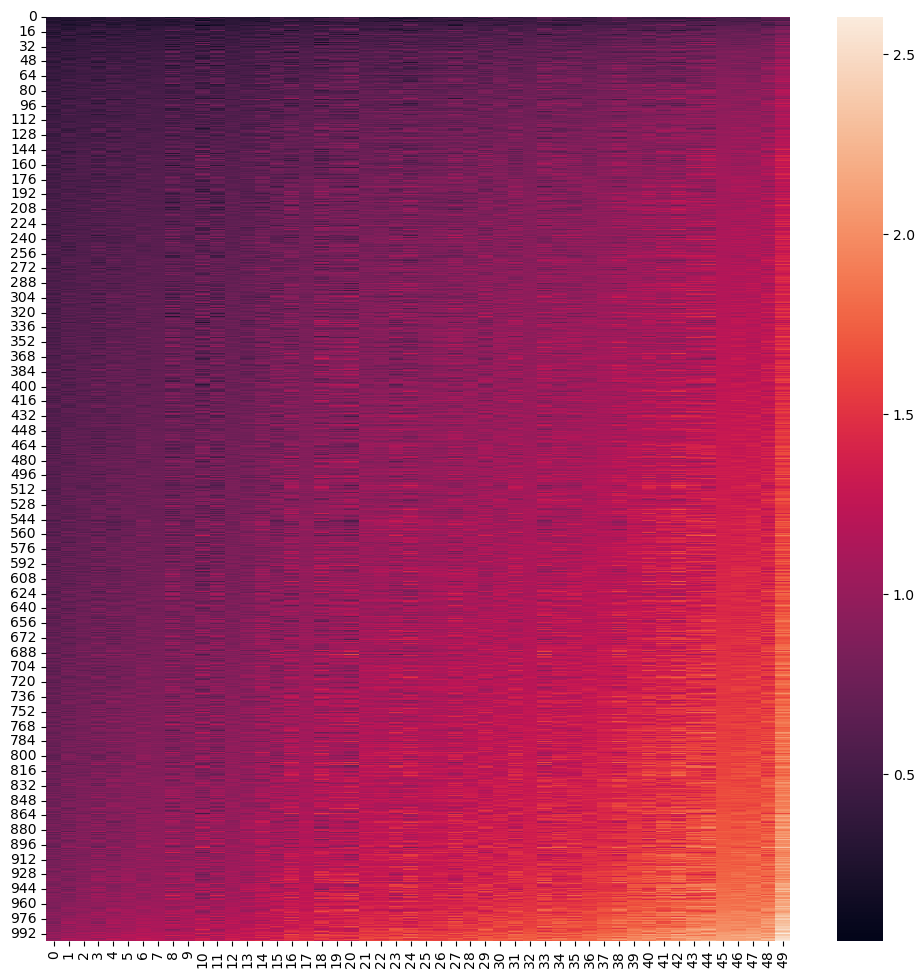

In [288]:
plt.figure(figsize=(12, 12))
sns.heatmap(S)
plt.show()

### Пример запуска оптимизации(простой)

In [310]:
L_u = (S.shape[0] * np.random.uniform(0.3, 0.4, S.shape[1])).astype(int)
L_l = (S.shape[0] * np.random.uniform(0.00, 0.02, S.shape[1])).astype(int)
R_u = np.random.poisson(1., S.shape[0]) + 1
# R_u = (S.shape[1] * np.random.uniform(0.7, 1.00, S.shape[0])).astype(int)
# R_l = (S.shape[1] * np.random.uniform(0.2, 0.3, S.shape[0])).astype(int)

In [311]:
import cvxpy as cvx

In [312]:
# 1_200 / C.mean()

In [313]:
%%time
X = cvx.Variable(S.shape, boolean=True)
constraints = []

# sum by columns
constraints.append(cvx.sum(X, axis=0) <= L_u)
# constraints.append(cvx.sum(X, axis=0) >= L_l)

# sum by row
constraints.append(cvx.sum(X, axis=1) <= R_u)
# constraints.append(cvx.sum(X, axis=1) >= R_l)

# sum budget
# constraints.append(cvx.sum(cvx.multiply(C, X)) <= 71_000)
# constraints.append(cvx.sum(X) <= 1_857)

# total revenue to max
objective = cvx.Maximize(cvx.sum(cvx.multiply(S, X)))

# cvx problem
prblm = cvx.Problem(objective, constraints)

# solve
options = {'maximumSeconds': 2}
res = prblm.solve('CBC', **options)


CPU times: user 693 ms, sys: 92.1 ms, total: 785 ms
Wall time: 785 ms


In [314]:
prblm.solution.status

'optimal'

In [315]:
X_sol = np.abs(X.value.round(0))
X_sol.sum(axis=0)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   5.,   0.,
         0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,
        12.,   2.,   4.,   0.,   1.,  33.,   0.,  53.,  41., 171., 107.,
       191., 115., 265., 251., 324., 396.])

In [316]:
X_sol.sum() / np.prod(S.shape)

0.03954

In [317]:
(C * X_sol).sum()

73909.38376992015

In [318]:
X_sol.sum()

1977.0

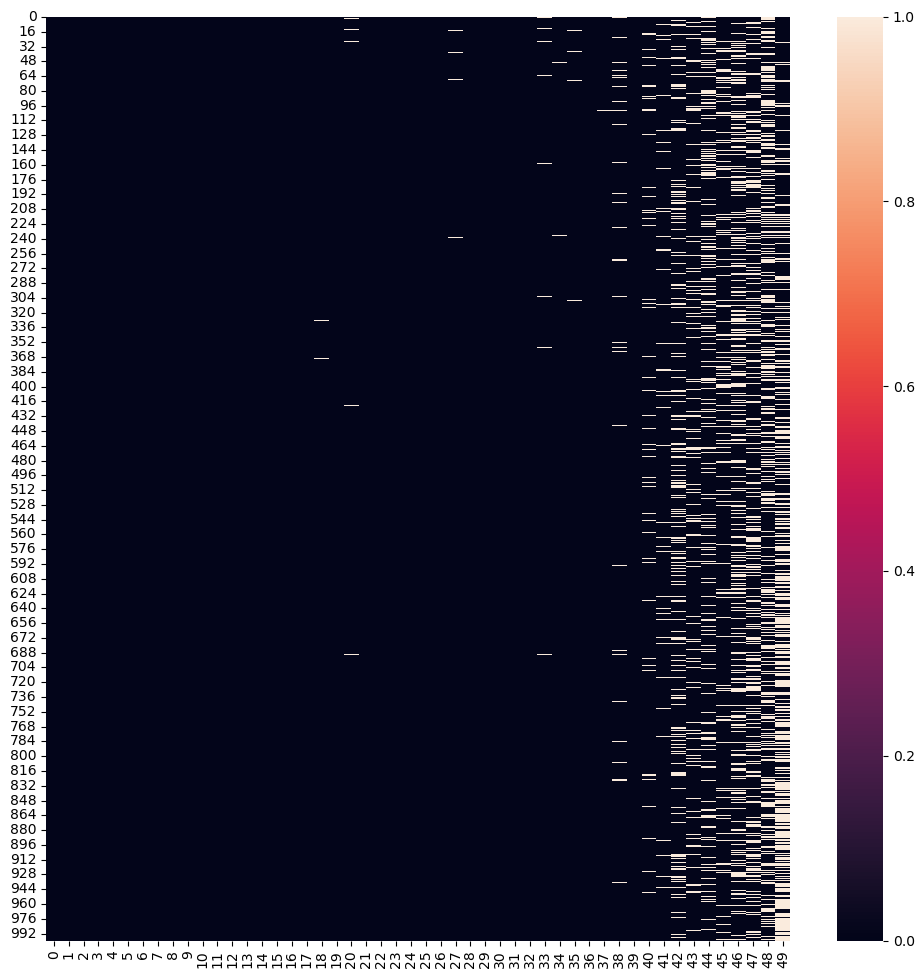

In [319]:
plt.figure(figsize=(12, 12))
sns.heatmap(X_sol)
plt.show()

In [1]:
38.79/77.98

0.4974352398050782

### Пример запуска оптимизации(сложный)

### Сравнение решений оптимизаторов

### Тестовые примеры с pytest